In [30]:

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import numba
# %load_ext line_profiler

In [35]:
# @numba.jit
def blink_detect():
    x = np.arange(0, 14)
    y = np.array([
    1, 0.9, .5, 0.0, 0.1, 0.8, .7, .8, .9, .3, .2, .4, 1, .8
    ])
    
    epsilon = 0.01
    threshold = 0.4 * y.min() + 0.6*y.max()
    n = len(y)

    dy_dx = y[1:]-y[:-1]
    i = np.where(dy_dx==0)[0]
    if len(i) != 0:
        for k in i:
            if k==0:
                dy_dx[0] -= epsilon
            else:
                dy_dx[k] = epsilon * dy_dx[k-1]
    m = n-1
    c = dy_dx[1:m]*dy_dx[:m-1]
    x = np.where(c < 0)[0] + 1

    xtrema_ears = y[x]
    t = np.ones_like(x)
    t[xtrema_ears < threshold] =- 1


    t = np.concatenate(([1], t, [1]))
    xtrema_ears = np.concatenate(([y[0]],xtrema_ears,[y[n-1]]))
    xtrema_idx = np.concatenate(([0], x, [n-1]))

    z = t[1:]*t[:-1]
    z_idx = np.where(z < 0)[0]
    num_of_blinks = len(z_idx) // 2

    selected_ear = xtrema_ears[z_idx], xtrema_ears[z_idx+1]
    selected_idx = xtrema_idx[z_idx], xtrema_idx[z_idx+1]
#     print(z_idx)
#     print(selected_ear)
# #     print(selected_idx)
#     plt.plot(y)
#     for i, l in enumerate(selected_ear[0]):
#         plt.plot(selected_idx[0][i], l, 'go', c='r', alpha=0.3)
        
#     for i, l in enumerate(selected_ear[1]):
#         plt.plot(selected_idx[1][i], l, 'go', c='g', alpha=0.3)



# before optimization: 38.9 µs ± 538 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
# %timeit blink_detect()

In [36]:
%timeit blink_detect()

35.2 µs ± 74.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
def Ultimate_Blink_Check(values):
        #Given the input "values", retrieve blinks and their quantities
        y = np.array([
                1, 0.9, .5, 0.0, 0.1, 0.8, .7, .8, .9, .3, .2, .4, 1, .8
                ])
        retrieved_blinks=[]
        MISSED_BLINKS=False
        values=y
        #print("Values", values.shape)
        THRESHOLD=0.4*np.min(values)+0.6*np.max(values)   # this is to split extrema in highs and lows
        #print(THRESHOLD)
        N=len(values)
        Derivative=values[1:N]-values[0:N-1]    #[-1 1] is used for derivative
        i=np.where(Derivative==0)
        if len(i[0])!=0:
            for k in i[0]:
                if k==0:
                    Derivative[0]=-EPSILON
                else:
                    Derivative[k]=EPSILON*Derivative[k-1]
        M=N-1    #len(Derivative)
        ZeroCrossing=Derivative[1:M]*Derivative[0:M-1]
        #print("ZeroCrossing", ZeroCrossing.shape)
        x = np.where(ZeroCrossing < 0)
       #print(x[0])
        xtrema_index=x[0]+1
        #print(xtrema_index)
        XtremaEAR=values[xtrema_index]
        #print(XtremaEAR.shape, XtremaEAR)
        Updown=np.ones(len(xtrema_index))        # 1 means high, -1 means low for each extremum
        #print(XtremaEAR)
        #print(XtremaEAR<THRESHOLD)
        Updown[XtremaEAR<THRESHOLD]=-1           #this says if the extremum occurs in the upper/lower half of signal
        #concatenate the beginning and end of the signal as positive high extrema
        Updown=np.concatenate(([1],Updown,[1]))
        XtremaEAR=np.concatenate(([values[0]],XtremaEAR,[values[N-1]]))
        xtrema_index = np.concatenate(([0], xtrema_index,[N - 1]))
        ##################################################################

        Updown_XeroCrossing = Updown[1:len(Updown)] * Updown[0:len(Updown) - 1]
        jump_index = np.where(Updown_XeroCrossing < 0)
        #print(jump_index)
        numberOfblinks = int(len(jump_index[0]) / 2)
        selected_EAR_First = XtremaEAR[jump_index[0]]
        selected_EAR_Sec = XtremaEAR[jump_index[0] + 1]
        #print(selected_EAR_First, selected_EAR_Sec)
        selected_index_First = xtrema_index[jump_index[0]]
        selected_index_Sec = xtrema_index[jump_index[0] + 1]
        if numberOfblinks>1:
            MISSED_BLINKS=True
        if numberOfblinks ==0:
            pass
#             print(Updown,Last_Blink.duration)
#             print(values)
#             print(Derivative)
        for j in range(numberOfblinks):
            pass
#             print(j)
#             detected_blink=Blink()
#             detected_blink.start=selected_index_First[2*j]
#             detected_blink.peak = selected_index_Sec[2*j]
#             detected_blink.end = selected_index_Sec[2*j + 1]

#             detected_blink.startEAR=selected_EAR_First[2*j]
#             detected_blink.peakEAR = selected_EAR_Sec[2*j]
#             detected_blink.endEAR = selected_EAR_Sec[2*j + 1]

#             detected_blink.duration=detected_blink.end-detected_blink.start+1
#             detected_blink.amplitude=0.5*(detected_blink.startEAR-detected_blink.peakEAR)+0.5*(detected_blink.endEAR-detected_blink.peakEAR)
#             detected_blink.velocity=(detected_blink.endEAR-selected_EAR_First[2*j+1])/(detected_blink.end-selected_index_First[2*j+1]+1) #eye opening ave velocity
#             retrieved_blinks.append(detected_blink)



        return MISSED_BLINKS,retrieved_blinks

In [46]:
def linear_interp(start,end,N):
    m=(end-start)/(N+1)
    x=np.linspace(1,N,N)
    y=m*(x-0)+start
    return y


%timeit linear_interp(0, 10, 5)
lin

22.7 µs ± 569 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


[1.6666666666666667,
 3.3333333333333335,
 5.0,
 6.666666666666667,
 8.333333333333334]

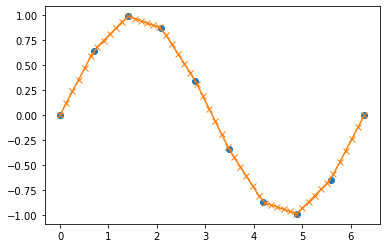

In [41]:
x = np.linspace(0, 2*np.pi, 10)
y = 
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
plt.plot(x, y, 'o')

plt.plot(xvals, yinterp, '-x')